## INTELLIGENT DATA ANALYSIS AND DATA MINING

Daniel Natanael García Zapata

<img src="iris.png" style="width: 60%; height: 60%" alt="Iris Dataset">

In [157]:
import pandas as pd

df = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])

### Visualize

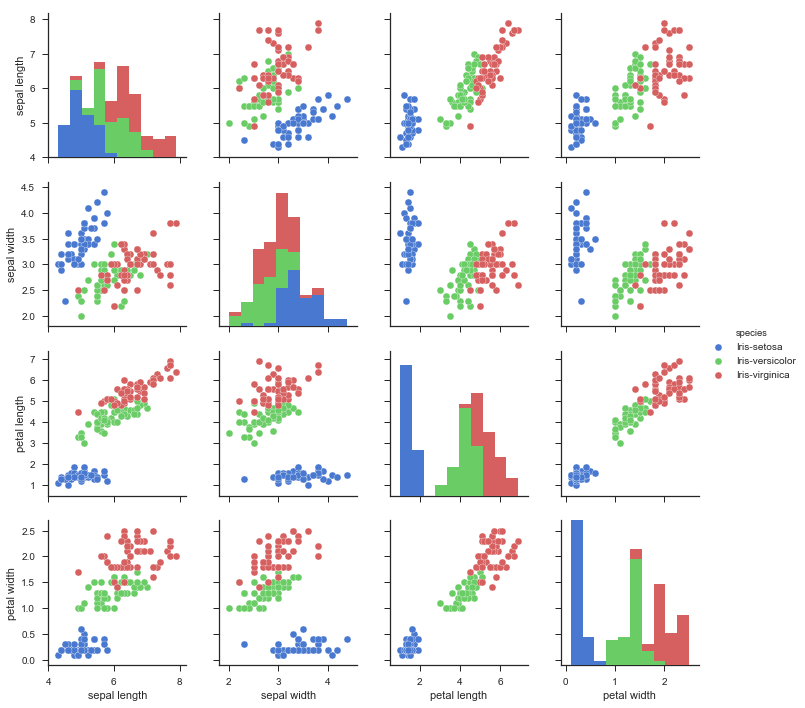

In [158]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

with plt.rc_context(dict(sns.axes_style("whitegrid"), **sns.plotting_context("notebook"))):
    colours = ['#3498db', '#e74c3c', '#2ecc71']
    
    sns.set(style="ticks")
    sns.pairplot(df, hue="species", palette='muted')
    
plt.show()

One of the first things to do with any dataset is to visualize it to learn the distribution of the data. The previous figure shows the plot of each pair of feature colour encoded with the iris specie. From the previous plot, it is important to note that the specie setosa is linearly separable from the rest. However, versicolor and virginica are not linearly separable between each other.

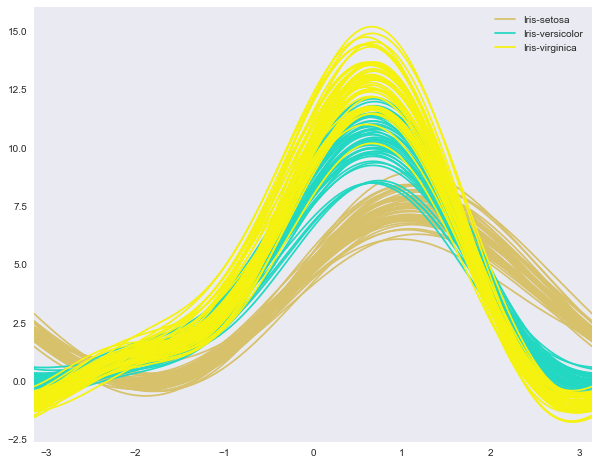

In [82]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(10,8))
andrews_curves(df, "species")
plt.show()

### Standardize

Standardize

In [159]:
'''
Convert categorical column from string to int
'''
# Create category column
df['class'] = df.species.astype('category').cat.codes

# Drop categorical column 'species'
df = df.drop(['species'], axis=1)

In [160]:
'''
Standardize
'''
# Select only columns to be standardized
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
features_to_standardize = df[col_names]

# Standardize features
standardize_features = ( features_to_standardize - features_to_standardize.mean() ) / features_to_standardize.std()
df[col_names] = standardize_features

In [161]:
'''
Create X and Y
'''
X = df[col_names]
Y = df['class']

### Explained Variance

In [26]:
'''
Obtain the Explained Variance of each eigenvector
'''
from sklearn.decomposition import PCA as sklearnPCA

# Obtain the covariance matrix
covariance_matrix = sklearnPCA(n_components=4)
covariance_matrix.fit_transform(X)

covariance_matrix.get_covariance()

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [50]:
# Obtain the explained variance of the eigenvectors
variance = covariance_matrix.explained_variance_ratio_

variance = np.insert(variance, 0, 0, axis=0)
variance

array([ 0.        ,  0.72770452,  0.23030523,  0.03683832,  0.00515193])

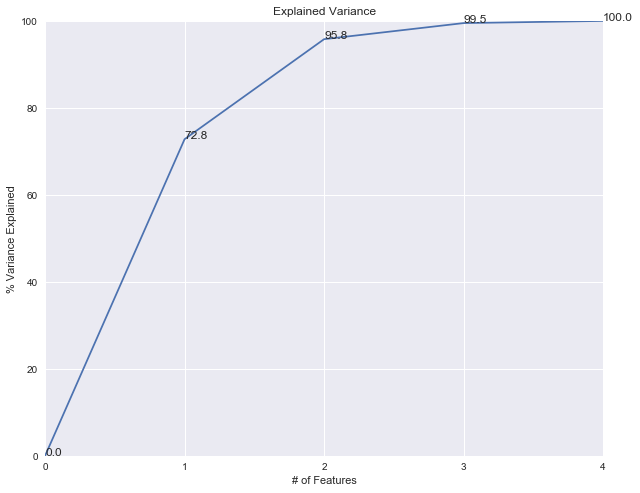

In [52]:
import numpy as np
var=np.cumsum(np.round(variance, decimals=3)*100)

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)

plt.title('Explained Variance')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.ylim(0,100)
plt.xlim(0,4)
plt.style.context('seaborn-whitegrid')
plt.xticks([0, 1, 2, 3, 4])

for xy, d in zip(enumerate(var), var):
    ax.annotate('%s' % d, xy=xy, textcoords='data')    

plt.plot(var)
plt.show()

### No Treatment

In [162]:
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.30, random_state=42)

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train) 
print('Logistic Regression score:', logreg.score(X_test, y_test) )

clf = SVC()
clf.fit(X_train, y_train) 
print('SVM score:', clf.score(X_test, y_test) )

Logistic Regression score: 0.888888888889
SVM score: 1.0


### PCA

In [83]:
PCA = sklearnPCA(n_components=2)
df_pca = PCA.fit_transform(X)

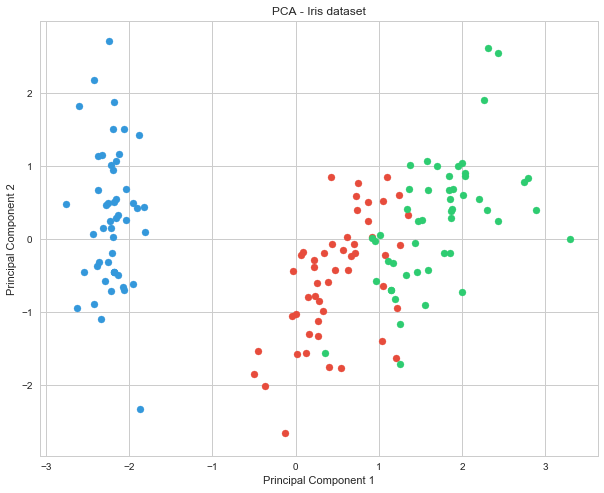

In [108]:
# Create PCA scatterplot

plt.figure(figsize=(10,8))

with plt.rc_context(dict(sns.axes_style("whitegrid"), **sns.plotting_context("notebook"))):
    labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colours = ['#3498db', '#e74c3c', '#2ecc71']

    for label, colour in zip(labels, colours):
        plt.scatter(df_pca[species == label, 0],
                    df_pca[species == label, 1],
                    label=label,
                    c=colour)

# Set figure parameters
plt.title('PCA - Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [140]:
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca, Y, 
                                                    test_size=0.30, random_state=42)

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train) 
print('Logistic Regression score:', logreg.score(X_test, y_test) )

clf = SVC()
clf.fit(X_train, y_train) 
print('SVM score:', clf.score(X_test, y_test) )

Logistic Regression score: 0.844444444444
SVM score: 0.933333333333


### LDA

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)
df_lda = LDA.fit(df[col_names], df['class']).transform(df[col_names])

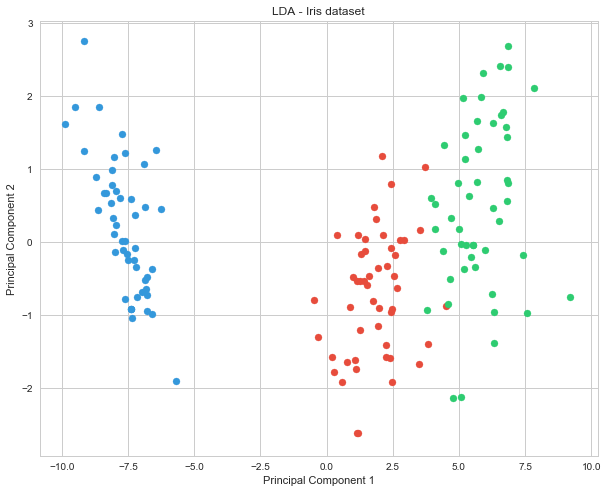

In [109]:
# Create LDA scatterplot

plt.figure(figsize=(10,8))

with plt.rc_context(dict(sns.axes_style("whitegrid"), **sns.plotting_context("notebook"))):
    labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colours = ['#3498db', '#e74c3c', '#2ecc71']

    for label, colour in zip(labels, colours):
        plt.scatter(df_lda[species == label, 0],
                    df_lda[species == label, 1],
                    label=label,
                    c=colour)

# Set figure parameters
plt.title('LDA - Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [125]:
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_lda, Y, 
                                                    test_size=0.30, random_state=42)

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train) 
print('Logistic Regression score:', logreg.score(X_test, y_test) )

clf = SVC()
clf.fit(X_train, y_train) 
print('SVM score:', clf.score(X_test, y_test) )

Logistic Regression score: 0.933333333333
SVM score: 1.0


### Kernel PCA

In [111]:
from sklearn.decomposition import KernelPCA

KPCA = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
df_kpca = KPCA.fit_transform(df[col_names])

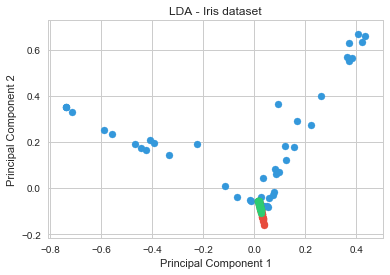

In [114]:
# Create Kernel PCA scatterplot
with plt.rc_context(dict(sns.axes_style("whitegrid"), **sns.plotting_context("notebook"))):
    labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colours = ['#3498db', '#e74c3c', '#2ecc71']

    for label, colour in zip(labels, colours):
        plt.scatter(df_kpca[species == label, 0],
                    df_kpca[species == label, 1],
                    label=label,
                    c=colour)

# Set figure parameters
plt.title('LDA - Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

### Filters

In [185]:
from skrebate import ReliefF

fs = ReliefF()
fs.fit(df[col_names].values, df['class'])

for feature_name, feature_score in zip(genetic_data.drop('class', axis=1).columns,
                                       fs.feature_importances_):
    print(feature_name, '\t', feature_score)

N0 	 794.814814815
N1 	 340.222222222
N2 	 1938.89265537
N3 	 2038.38888889


### Wrappers

In [187]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.09650292  0.03302451  0.3435944   0.52687817]


In [186]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [193]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = df[col_names].values
y = df['class']

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)

print(rfe.support_)                    # The mask of selected features.
print('Ranking', rfe.ranking_)

[False False False  True]
Ranking [4 3 2 1]


Higher positive scores indicate that the features are likely predictive of the outcome, whereas negative scores indicate that the features are likely noise. We generally recommend removing all features with negative scores at a minimum.

https://epistasislab.github.io/scikit-rebate/using/

### Bibliography

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Ryan J. Urbanowicz, Randal S. Olson, Peter Schmitt, Melissa Meeker, Jason H. Moore (2017). Benchmarking Relief-Based Feature Selection Methods. arXiv preprint, under review.